In [4]:
deriv_Nt(nt, K, r) = r*nt*(1-nt/K)
next_Nt(nt, K, r, h) = nt + h*deriv_Nt(nt, K, r)
#ntはその時の人口

next_Nt (generic function with 1 method)

In [5]:
methods(deriv_Nt)

# 1 method for generic function "deriv_Nt":
[1] deriv_Nt(nt, K, r) in Main at c:\Users\toipo\OneDrive - 埼玉大学\デスクトップ\復習\logistic\notebook\logistic.ipynb:1

In [6]:
# 各種パラメータを定義
tmax = 10.0 # 終了時刻
r = 1.0 # パラメータ1
K = 10.0 #パラメータ2
N0 = 1.0 # 人口の初期値
numtimes  = 100 # 0 ≦ t < tmaxの分割数

h = tmax/numtimes

0.1

In [7]:
results = Vector{Float64}(undef, numtimes+1)

# 初期値
results[1] = N0

# 時間発展
for t in 1:numtimes
    results[t+1] = next_Nt(results[t], K, r, h)
end

In [13]:
results

101-element Vector{Float64}:
 1.0
 1.09
 1.187119
 1.29173838479839
 1.4042263427306136
 1.524930460787489
 1.6541693777638624
 1.7922235522369319
 1.9393252548486974
 2.0956479558926278
 ⋮
 9.992892131865181
 9.993602413460769
 9.994241762823556
 9.994817254968247
 9.995335260862962
 9.995801517178753
 9.996221189188297
 9.996598927475356
 9.996938919054877

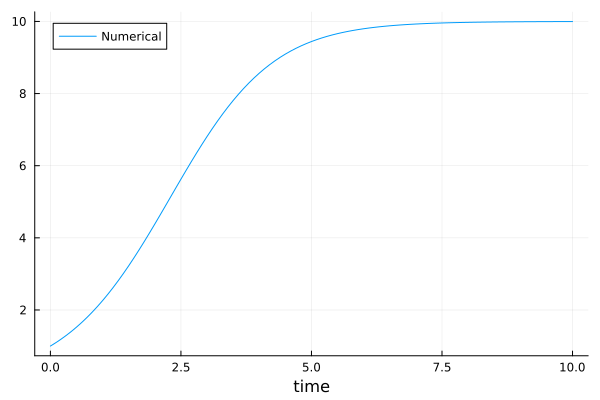

In [8]:
using Plots

times = LinRange(0, tmax, numtimes+1)

plot(times, results, label="Numerical", xlabel="time")

In [10]:
# 型安定性のチェック
@code_warntype deriv_Nt(N0, K, r)

MethodInstance for deriv_Nt(::Float64, ::Float64, ::Float64)
  from deriv_Nt(nt, K, r) in Main at c:\Users\toipo\OneDrive - 埼玉大学\デスクトップ\復習\logistic\notebook\logistic.ipynb:1
Arguments
  #self#::Core.Const(deriv_Nt)
  nt::Float64
  K::Float64
  r::Float64
Body::Float64
1 ─ %1 = (nt / K)::Float64
│   %2 = (1 - %1)::Float64
│   %3 = (r * nt * %2)::Float64
└──      return %3



In [12]:
@code_warntype next_Nt(N0, K, r, h)

MethodInstance for next_Nt(::Float64, ::Float64, ::Float64, ::Float64)
  from next_Nt(nt, K, r, h) in Main at c:\Users\toipo\OneDrive - 埼玉大学\デスクトップ\復習\logistic\notebook\logistic.ipynb:2
Arguments
  #self#::Core.Const(next_Nt)
  nt::Float64
  K::Float64
  r::Float64
  h::Float64
Body::Float64
1 ─ %1 = Main.deriv_Nt(nt, K, r)::Float64
│   %2 = (h * %1)::Float64
│   %3 = (nt + %2)::Float64
└──      return %3



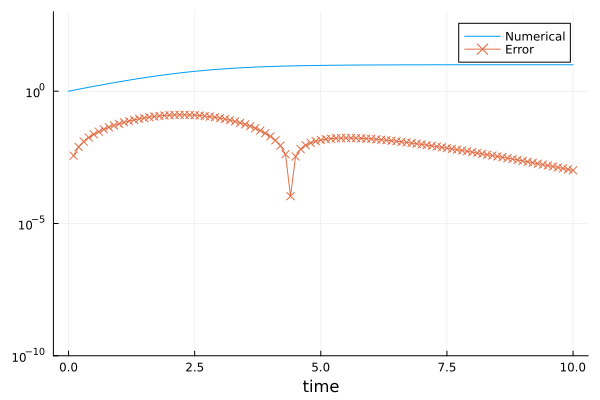

In [9]:
exact_Nt(time) = K/(1+(K-N0) / N0 * exp(-r*time))

p = plot(yaxis=:log, ylims=(1e-10, 1000),  xlabel="time")
plot!(p, times, results, label="Numerical")
plot!(p, times, abs.(results .- exact_Nt.(times)), marker=:x, label="Error")

In [1]:
using Pkg
Pkg.rm("DifferentialEquations")
Pkg.add("DifferentialEquations")

    Updating `C:\Users\toipo\OneDrive - 埼玉大学\デスクトップ\復習\logistic\Project.toml`
  [0c46a032] - DifferentialEquations v7.8.0
    Updating `C:\Users\toipo\OneDrive - 埼玉大学\デスクトップ\復習\logistic\Manifest.toml`
  [47edcb42] - ADTypes v0.1.3
  [79e6a3ab] - Adapt v3.6.2
  [ec485272] - ArnoldiMethod v0.2.0
  [4fba245c] - ArrayInterface v7.4.8
  [30b0a656] - ArrayInterfaceCore v0.1.29
  [4c555306] - ArrayLayouts v1.0.5
  [aae01518] - BandedMatrices v0.17.25
  [62783981] - BitTwiddlingConvenienceFunctions v0.1.5
  [764a87c0] - BoundaryValueDiffEq v2.11.0
  [fa961155] - CEnum v0.4.2
  [2a0fbf3d] - CPUSummary v0.2.3
  [49dc2e85] - Calculus v0.5.1
  [fb6a15b2] - CloseOpenIntervals v0.1.12
  [38540f10] - CommonSolve v0.2.4
  [bbf7d656] - CommonSubexpressions v0.3.0
  [adafc99b] - CpuId v0.3.1
  [e2d170a0] - DataValueInterfaces v1.0.0
  [bcd4f6db] - DelayDiffEq v5.42.0
  [b429d917] - DensityInterface v0.4.0
  [2b5f629d] - DiffEqBase v6.125.1
  [459566f4] - DiffEqCallbacks v2.26.1
  [77a26b50] - DiffEqNois

+ LayoutPointers v0.1.14
  [50d2b5c4] + Lazy v0.15.1
  [2d8b4e74] + LevyArea v1.0.0
  [d3d80556] + LineSearches v7.2.0
  [7ed4a6bd] + LinearSolve v2.1.12
  [bdcacae8] + LoopVectorization v0.12.159
  [d125e4d3] + ManualMemory v0.1.8
  [46d2c3a1] + MuladdMacro v0.2.4
  [d41bc354] + NLSolversBase v7.8.3
  [2774e3e8] + NLsolve v4.5.1
  [8913a72c] + NonlinearSolve v1.8.0
  [6fe1bfb0] + OffsetArrays v1.12.9
  [429524aa] + Optim v1.7.6
  [1dea7af3] + OrdinaryDiffEq v6.53.0
  [90014a1f] + PDMats v0.11.17
  [d96e819e] + Parameters v0.12.3
  [e409e4f3] + PoissonRandom v0.4.4
  [f517fe37] + Polyester v0.7.3
  [1d0040c9] + PolyesterWeave v0.2.1
  [85a6dd25] + PositiveFactorizations v0.2.4
  [d236fae5] + PreallocationTools v0.4.12
  [1fd47b50] + QuadGK v2.8.2
  [74087812] + Random123 v1.6.1
  [e6cf234a] + RandomNumbers v1.5.3
  [731186ca] + RecursiveArrayTools v2.38.5
  [f2c3362d] + RecursiveFactorization v0.2.18
  [ae5879a3] + ResettableStacks v1.1.1
  [79098fc4] + Rmath v0.7.1
  [7e49a35a] + Runt

In [2]:
using DifferentialEquations

ERROR: LoadError: MethodError: no method matching cholesky(::Matrix{Float64}, ::LinearAlgebra.NoPivot; check=false)
Closest candidates are:
  cholesky(::Union{Union{LinearAlgebra.Hermitian{Complex{var"#s854"}, var"#s853"}, LinearAlgebra.Hermitian{var"#s854", var"#s853"}, LinearAlgebra.Symmetric{var"#s854", var"#s853"}} where {var"#s854"<:Real, var"#s853"<:(StridedMatrix{T} where T)}, StridedMatrix}) at C:\Users\toipo\AppData\Local\Programs\Julia-1.7.0\share\julia\stdlib\v1.7\LinearAlgebra\src\cholesky.jl:394 got unsupported keyword argument "check"
  cholesky(::Union{Union{LinearAlgebra.Hermitian{Complex{var"#s852"}, var"#s851"}, LinearAlgebra.Hermitian{var"#s852", var"#s851"}, LinearAlgebra.Symmetric{var"#s852", var"#s851"}} where {var"#s852"<:Real, var"#s851"<:(StridedMatrix{T} where T)}, StridedMatrix}, ::Val{false}; check) at C:\Users\toipo\AppData\Local\Programs\Julia-1.7.0\share\julia\stdlib\v1.7\LinearAlgebra\src\cholesky.jl:394
  cholesky(::Union{Union{LinearAlgebra.Hermitian{C

source::String)
    @ Base .\loading.jl:1318
  [9] top-level scope
    @ none:1
 [10] eval
    @ .\boot.jl:373 [inlined]
 [11] eval(x::Expr)
    @ Base.MainInclude .\client.jl:453
 [12] top-level scope
    @ none:1
in expression starting at C:\Users\toipo\.julia\packages\DifferentialEquations\9GdKy\src\DifferentialEquations.jl:1


ErrorException: Failed to precompile DifferentialEquations [0c46a032-eb83-5123-abaf-570d42b7fbaa] to C:\Users\toipo\.julia\compiled\v1.7\DifferentialEquations\jl_5EE.tmp.